In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# train test split
from sklearn.model_selection import train_test_split
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
#MSE
from sklearn.metrics import mean_squared_error

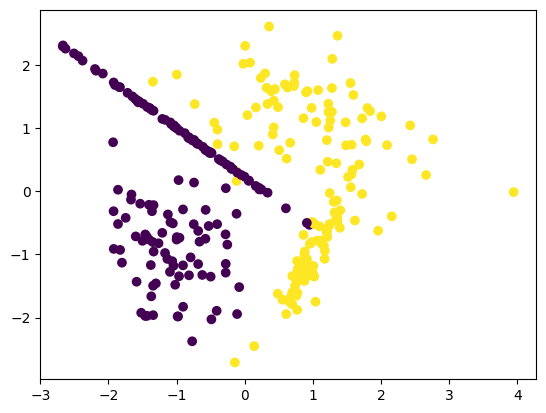

In [13]:
X,y = make_classification(n_samples=300, n_features=2,n_informative=2, n_redundant=0, n_classes=2,random_state=42)
plt.scatter(X[:,0],X[:,1],c=y);

In [14]:
whole_X, whole_y = X, y
pool_X_train, pool_X_test, y_train, y_test = train_test_split(whole_X, whole_y, test_size=0.2)
y_test.reshape(-1, 1)
train_ind = np.random.choice(len(whole_X), int(len(whole_X) * 0.04), replace=False)
train_X = whole_X[train_ind]
train_y = whole_y[train_ind]
print("Size of whole_X:", whole_X.shape)
print("Size of whole_y:", whole_y.shape)
print("Size of pool_X_train:", pool_X_train.shape)
print("Size of pool_X_test:", pool_X_test.shape)
print("Size of y_train:", y_train.shape)
print("Size of y_test:", y_test.shape)
print("Size of train_X:", train_X.shape)
print("Size of train_y:", train_y.shape)

Size of whole_X: (300, 2)
Size of whole_y: (300,)
Size of pool_X_train: (240, 2)
Size of pool_X_test: (60, 2)
Size of y_train: (240,)
Size of y_test: (60,)
Size of train_X: (12, 2)
Size of train_y: (12,)


In [15]:

model = LogisticRegression()
model.fit(train_X, train_y)
y_pred = model.predict(pool_X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


Accuracy: 0.8333333333333334


In [16]:
def entropy(p):
    return -np.sum(p * np.log2(p), axis=1)

In [17]:
def margin_sampling(probabilities):
    sorted_probs = np.sort(probabilities, axis=1)
    return sorted_probs[:, -1] - sorted_probs[:, -2]

In [18]:
def least_confident(probabilities):
    return 1 - np.max(probabilities, axis=1)

In [19]:
newly_added_X = np.array([]).reshape(0, 2)
newly_added_y = np.array([])
rmse_loss = []


In [20]:
def active_learning(train_X,train_y, pool_X_train, pool_y_train, pool_X_test, y_test, acquisition_function, num_iterations=10, number_of_sample=1):
    newly_added_X = np.array([]).reshape(0, 2)
    newly_added_y = np.array([])
    rmse_loss = []

    for _ in range(num_iterations):
        model = LogisticRegression()
        model.fit(train_X, train_y)
        pool_probabilities = model.predict_proba(pool_X_train)
        acquisition_scores = acquisition_function(pool_probabilities)
        selected_indices = np.argsort(acquisition_scores)[-number_of_sample:]
        labeled_X = pool_X_train[selected_indices]
        labeled_y = pool_y_train[selected_indices]

        train_X = np.concatenate((train_X, labeled_X), axis=0)
        train_y = np.concatenate((train_y, labeled_y), axis=0)
        pool_X_train = np.delete(pool_X_train, selected_indices, axis=0)
        pool_y_train = np.delete(pool_y_train, selected_indices)
        
        newly_added_X = np.concatenate((newly_added_X, labeled_X), axis=0)
        newly_added_y = np.concatenate((newly_added_y, labeled_y), axis=0)

        y_pred = model.predict(pool_X_test)

        accuracy = accuracy_score(y_test, y_pred)
        rmse_score = np.sqrt(mean_squared_error(train_y, model.predict(train_X)))
        print("RMSE score and Accuracy score after iteration {}: {:.4f} {:.4f}".format(_ + 1, rmse_score, accuracy))

        rmse_loss.append(rmse_score)

    return train_X, train_y, newly_added_X, newly_added_y, rmse_loss


In [21]:
train_X, train_y, newly_added_X, newly_added_y, rmse_loss = active_learning(train_X,train_y,pool_X_train, y_train, pool_X_test, y_test,acquisition_function=least_confident,
                                                                             num_iterations=10,
                                                                             number_of_sample=1)

train_X_least_entropy, train_y_least_entropy, newly_added_X_entropy, newly_added_y_entropy, rmse_loss_least_entropy = active_learning(train_X,train_y,pool_X_train, y_train, pool_X_test, y_test,
                                                                                                 acquisition_function=entropy,
                                                                                                 num_iterations=10,
                                                                                                 number_of_sample=1)

train_X_least_margin, train_y_least_margin, newly_added_X_margin, newly_added_y_margin, rmse_loss_least_margin = active_learning(train_X,train_y,pool_X_train, y_train, pool_X_test, y_test,
                                                                                                 acquisition_function=margin_sampling,
                                                                                                 num_iterations=10,
                                                                                                 number_of_sample=1)


RMSE score and Accuracy score after iteration 1: 0.0000 0.8333
RMSE score and Accuracy score after iteration 2: 0.0000 0.8500
RMSE score and Accuracy score after iteration 3: 0.0000 0.8667
RMSE score and Accuracy score after iteration 4: 0.2500 0.8500
RMSE score and Accuracy score after iteration 5: 0.2425 0.9000
RMSE score and Accuracy score after iteration 6: 0.2357 0.9000
RMSE score and Accuracy score after iteration 7: 0.2294 0.9000
RMSE score and Accuracy score after iteration 8: 0.2236 0.9000
RMSE score and Accuracy score after iteration 9: 0.2182 0.8833
RMSE score and Accuracy score after iteration 10: 0.3015 0.9000
RMSE score and Accuracy score after iteration 1: 0.2949 0.8667
RMSE score and Accuracy score after iteration 2: 0.3536 0.9000
RMSE score and Accuracy score after iteration 3: 0.4000 0.9000
RMSE score and Accuracy score after iteration 4: 0.3922 0.9000
RMSE score and Accuracy score after iteration 5: 0.4303 0.9000
RMSE score and Accuracy score after iteration 6: 0.378

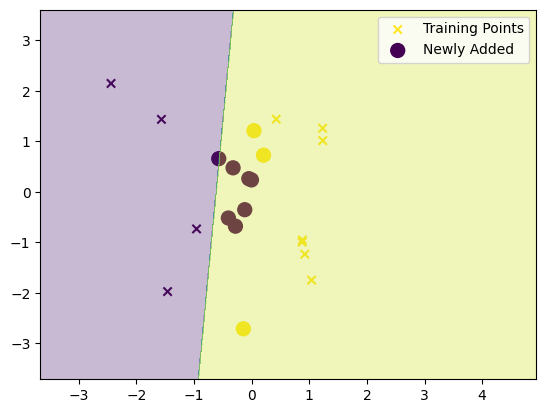

In [22]:
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_y, cmap='viridis', marker='x', label='Training Points')
plt.scatter(newly_added_X[:, 0], newly_added_X[:, 1], c=newly_added_y, cmap='viridis', marker='o', s=100, label='Newly Added')
x_min, x_max = whole_X[:, 0].min() - 1, whole_X[:, 0].max() + 1
y_min, y_max = whole_X[:, 1].min() - 1, whole_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis');
plt.legend();

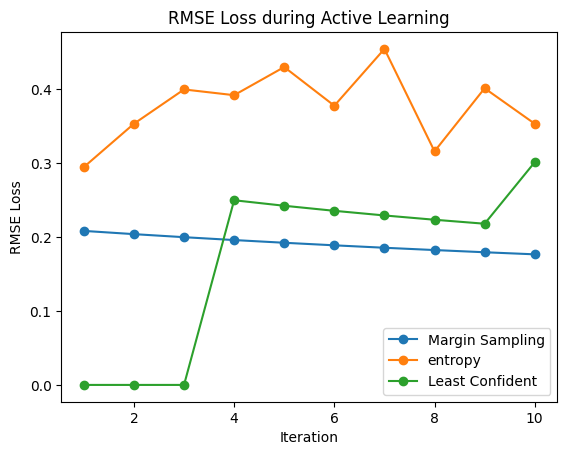

In [23]:
plt.plot(range(1, len(rmse_loss_least_margin) + 1), rmse_loss_least_margin, marker='o',label='Margin Sampling')
plt.plot(range(1, len(rmse_loss_least_entropy) + 1), rmse_loss_least_entropy,marker='o', label='entropy')
plt.plot(range(1, len(rmse_loss) + 1), rmse_loss, marker='o',label='Least Confident')
plt.xlabel('Iteration')
plt.ylabel('RMSE Loss')
plt.title('RMSE Loss during Active Learning')
plt.legend();